In [1]:
# manage data and fit
import pandas as pd
import numpy as np

# scipy ODR : orthogonal distance regression
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid")

In [2]:
def func(beta, x):
    y = beta[0]+beta[1]*x+beta[2]*x**3
    return y

## generate data

In [16]:
npts = 100
x = np.linspace(-3, 2, npts)
y = func([-2.3, 7.0, -4.0], x)

sigma_x = .3
sigma_y = .1

# add some noise
x += np.random.normal(scale=sigma_x, size=100)
y += np.random.normal(scale=sigma_y, size=100)

## Define model

In [4]:
data = RealData(x, y, 0.3, 0.1)
model = Model(func)
odr = ODR(data, model, [1,0,0])

## Least squarre fit

In [17]:
odr.set_job(fit_type=0)
lsq_output = odr.run()
print("   stop reason:", lsq_output.stopreason)
print("        params:", lsq_output.beta)
print("          info:", lsq_output.info)
print("       sd_beta:", lsq_output.sd_beta)
print("sqrt(diag(cov):", np.sqrt(np.diag(lsq_output.cov_beta)))
if lsq_output.info != 1:
    print("\nRestart ODR till convergence is reached")
    i = 1
    while lsq_output.info != 1 and i < 100:
        print("restart", i)
        lsq_output = odr.restart()
        i += 1
    print("   stop reason:", lsq_output.stopreason)
    print("        params:", lsq_output.beta)
    print("          info:", lsq_output.info)
    print("       sd_beta:", lsq_output.sd_beta)
    print("sqrt(diag(cov):", np.sqrt(np.diag(lsq_output.cov_beta)))

   stop reason: ['Iteration limit reached']
        params: [-2.22734832  6.75662616 -3.67176618]
          info: 4
       sd_beta: [ 0.07831558  0.20026305  0.26145497]
sqrt(diag(cov): [ 0.06246561  0.15973262  0.20854016]

Restart ODR till converg
restart 1
restart 2
restart 3
restart 4
restart 5
restart 6
restart 7
restart 8
restart 9
   stop reason: ['Sum of squares convergence']
        params: [-2.44554153  7.66250065 -4.54786908]
          info: 1
       sd_beta: [ 0.22847093  0.44252551  0.34081546]
sqrt(diag(cov): [ 0.20286159  0.39292277  0.30261341]


In [6]:
lsq_output.pprint()

Beta: [-2.44554153  7.66250065 -4.54786908]
Beta Std Error: [ 0.22847093  0.44252551  0.34081546]
Beta Covariance: [[ 0.04115283 -0.05041786  0.02083095]
 [-0.05041786  0.1543883  -0.09039185]
 [ 0.02083095 -0.09039185  0.09157488]]
Residual Variance: 1.2684175365667625
Inverse Condition #: 0.02879855412231426
Reason(s) for Halting:
  Sum of squares convergence


## ODR fit

In [19]:
odr = ODR(data, model, [1,0,0])
odr.set_job(fit_type=2)
odr_output = odr.run()
print("   stop reason:", odr_output.stopreason)
print("        params:", odr_output.beta)
print("          info:", odr_output.info)
print("       sd_beta:", odr_output.sd_beta)
print("sqrt(diag(cov):", np.sqrt(np.diag(odr_output.cov_beta)))
if odr_output.info != 1:
    print("\nRestart ODR till convergence is reached")
    i = 1
    while odr_output.info != 1 and i < 100:
        print("restart", i)
        odr_output = odr.restart()
        i += 1
    print("   stop reason:", odr_output.stopreason)
    print("        params:", odr_output.beta)
    print("          info:", odr_output.info)
    print("       sd_beta:", odr_output.sd_beta)
    print("sqrt(diag(cov):", np.sqrt(np.diag(odr_output.cov_beta)))

   stop reason: ['Sum of squares convergence']
        params: [-0.34485999  3.35835453 -2.95127547]
          info: 1
       sd_beta: [ 1.03492689  1.29665668  0.23179696]
sqrt(diag(cov): [ 0.01074541  0.01346289  0.0024067 ]


## Plot

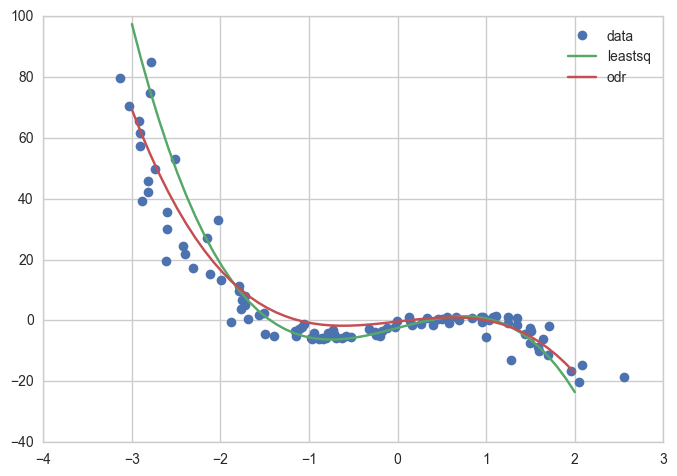

In [20]:
xn = np.linspace(-3, 2, 50)

plt.plot(x, y, marker="o", linestyle="", label="data")
plt.plot(xn, func(lsq_output.beta, xn), label='leastsq')
plt.plot(xn, func(odr_output.beta, xn), label='odr')
plt.legend()